#A multi layered fully Connected Neural Network to classify images from MNIST Dataset





##Introduction

### Dataset Information
This MNIST dataset consists of 70,000 images of handwritten digits where each digit of size 28 x 28 is flattened into a vector of size 784. These 70,000 images are split into training set and testing set where the training set consists of 60,000 images and the test set consists of 10,000 images.

###Library Imports

**Imports:** TensprFlow, NumPy, Pandas, matplotlib, keras, scikit-learn, seaborn

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0) # for constant results

##Importing MNIST Dataset

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data() # downloading data from tf datasets

###Checking Data

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


###Visualization

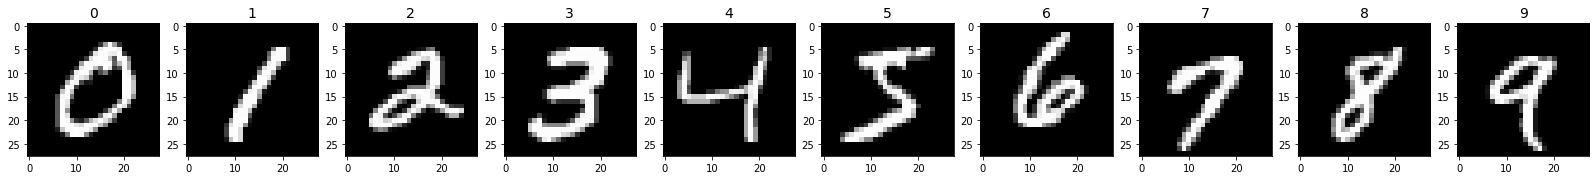

In [ ]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(28,28))
for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title(format(i), fontsize=14)

In [ ]:
for i in range(10):
  print(y_train[i], end=" ")

5 0 4 1 9 2 1 3 1 4 

##Processing the Data

###Changing the Representation

A binary matrix representation of the data for Classification.

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

###Vector Map
Printing the categorigal data.

In [ ]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


Normalising the Data

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [ ]:
print(x_train.shape)

(60000, 784)


##Building the Model

Summary of The Model at the Output

In [ ]:
cnnmodel = keras.models.Sequential()
cnnmodel.add(Dense(units=128, input_shape=(784,), activation='relu'))
cnnmodel.add(Dense(units=128, activation='relu'))
cnnmodel.add(Dropout(0.25))
cnnmodel.add(Dense(units=10, activation='softmax'))
cnnmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnnmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


## Fitting the Model with our Data
here x_train is the input and y_train output layer of our model.

In [ ]:
size = 128
epochs = 20
hist = cnnmodel.fit(x=x_train, y=y_train, batch_size=size, epochs=epochs)

Epoch 1/20
469/469 [==============================] - 16s 4ms/step - loss: 0.6629 - accuracy: 0.8014
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1551 - accuracy: 0.9546
Epoch 3/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1022 - accuracy: 0.9697
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0758 - accuracy: 0.9773
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0596 - accuracy: 0.9816
Epoch 6/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0479 - accuracy: 0.9852
Epoch 7/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0413 - accuracy: 0.9875
Epoch 8/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0334 - accuracy: 0.9895
Epoch 9/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0275 - accuracy: 0.9914
Epoch 10/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0234 - accuracy: 0.992

Checking for **Loss** and **Accuracy** of our trained model.

In [ ]:
loss, accuracy = cnnmodel.evaluate(x_test, y_test)
print("Loss: {}, Accuracy: {}".format(loss, accuracy))

313/313 [==============================] - 1s 1ms/step - loss: 0.0912 - accuracy: 0.9797
Loss: 0.0912303775548935, Accuracy: 0.9797000288963318


### Plotting the Model Fitting
Plotting the data for a better understanding.

You can see how the loss is reducing after every epoch and subsequently how the accuracy is increasing w.r.t. epoch.




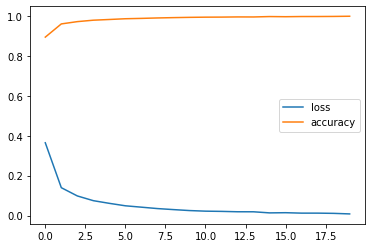

In [ ]:
metrics = pd.DataFrame(hist.history)
metrics[['loss', 'accuracy']].plot()

###Prediction Table

From this table we can see the prediction status for the x_test data. One Row value of the matrix is high. Determining the output for the o/p layer of our trained NN.

In [ ]:
y_predict = cnnmodel.predict(x_test)
y_predict_classes = np.argmax(y_predict, axis=1)
print(y_predict)
print(y_predict_classes)

[[3.94132562e-13 6.65187280e-11 1.43268114e-11 ... 9.99995112e-01
  3.85243222e-14 3.88585977e-06]
 [2.41825494e-13 1.78352213e-08 1.00000000e+00 ... 4.26383545e-14
  1.62237820e-10 7.68804118e-21]
 [1.26959288e-09 9.99990344e-01 4.21381316e-07 ... 9.05199272e-07
  6.80071162e-06 2.28615438e-09]
 ...
 [7.32056000e-18 3.05944137e-12 8.50224045e-18 ... 1.53688867e-11
  8.95307157e-13 3.02405878e-11]
 [3.46704514e-20 4.96311211e-20 6.74469662e-22 ... 3.69112341e-23
  4.26441593e-09 3.69843179e-19]
 [1.08332925e-17 2.83683576e-17 1.79838598e-18 ... 3.37954875e-24
  5.52201412e-14 1.52810713e-16]]
[7 2 1 ... 4 5 6]


## Chceking the Model
Randomly choosing a field to see if the prediction is correct or not. Our model has almost 98% accuracy and in this case this is predicting the correct value.

Text(0.5, 1.0, 'Predicted: 6, Original: 6')

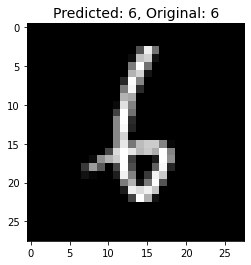

In [ ]:
random = np.random.choice(len(x_test))
x_sample = x_test[random]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random]
y_sample_predicted_class = y_predict_classes[random]

plt.imshow(x_sample.reshape(28, 28), cmap='gray')
plt.title("Predicted: {}, Original: {}".format(y_sample_predicted_class, y_sample_true), fontsize=14)

## Confusion Matrix

Confusion Matrix to see how our Classifier is operating.
Here We can individually see how our model is performing against different digits.

Text(0.5, 1.0, 'Confusion Matrix')

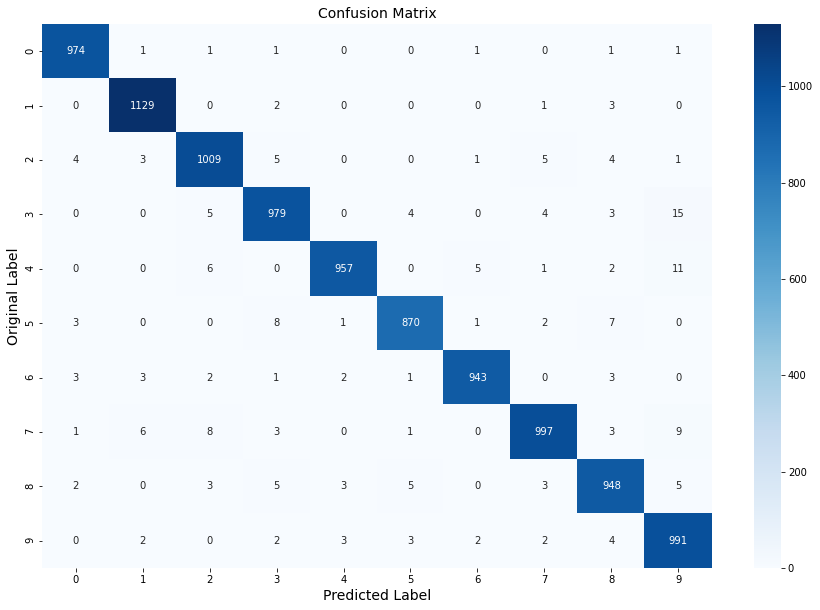

In [ ]:
cf_mat = confusion_matrix(y_true, y_predict_classes)
fig, axis = plt.subplots(figsize=(15,10))
ax = sns.heatmap(cf_mat, annot=True, fmt='g', ax=axis, cmap='Blues')
ax.set_xlabel("Predicted Label", fontsize=14)
ax.set_ylabel("Original Label", fontsize=14)
ax.set_title("Confusion Matrix", fontsize=14)

##Conclusion

We can see **'1'** is having the best predictive result(**most confident**) compared to other digits as it has the **least complication** and our model can predict almost every test data correctly whereas **'5'** is being the **least confident** among others as the digit itself has **complicated features**, so it is a little hard to perdict compared to other digits.